In [37]:
from pydub import AudioSegment
from pydub.playback import play
import numpy as np
# Specify the duration of the silent audio segment in milliseconds
silent_duration = 15000  # 5 seconds of silence

# Generate the silent audio segment
silent_audio = AudioSegment.silent(duration=silent_duration)

# You can export the silent audio segment if needed
silent_audio.export("./audio/silent" + ".wav", format="wav")


# Parameters for the Gaussian noise
# Generate Gaussian noise
mean = 0
std_dev = 1000  # Adjust the standard deviation to control the level of noise
num_samples = len(silent_audio)
noise = np.random.normal(mean, std_dev, num_samples)

# Create an AudioSegment from the noise data
noise_audio = AudioSegment(noise.tobytes(), frame_rate=silent_audio.frame_rate, sample_width=2, channels=1)


# Add the noise to the silent audio segment
noisy_audio = silent_audio.overlay(noise_audio)

# Export the noisy audio segment as a .wav file
noisy_audio.export("./audio/noisy_silent_audio.wav", format="wav")

# # Add the noise to the silent audio segment
# noisy_audio = silent_audio.overlay(AudioSegment(noise.tobytes(), frame_rate=silent_audio.frame_rate, sample_width=2))

# # Export the noisy audio segment as a .wav file
# noisy_audio.export("./normal_noisy_silent_audio.wav", format="wav")
                   
# Play the silent audio segment
# play(silent_audio)

<_io.BufferedRandom name='./audio/noisy_silent_audio.wav'>

In [3]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
from pydub import AudioSegment

# Calculate and plot spectrogram for a wav audio file
def graph_spectrogram(wav_file):
    rate, data = get_wav_info(wav_file)
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

# Load a wav file
def get_wav_info(wav_file):
    rate, data = wavfile.read(wav_file)
    return rate, data

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\axes\_axes.py:7726: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


(1998, 101)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


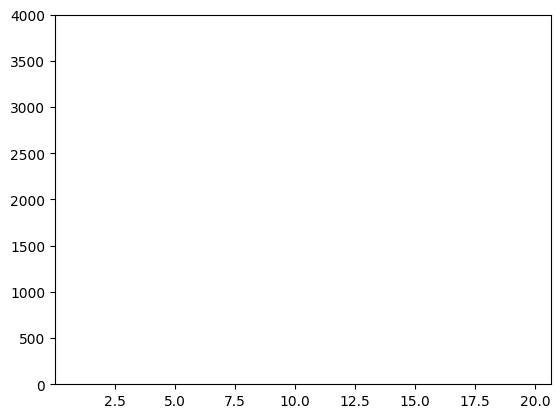

In [4]:
x = graph_spectrogram("./audio/silent.wav").T[0:1998,:]
print(x.shape)
print(x)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\axes\_axes.py:7726: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


(1998, 101)
1121855.5612502203
0.0


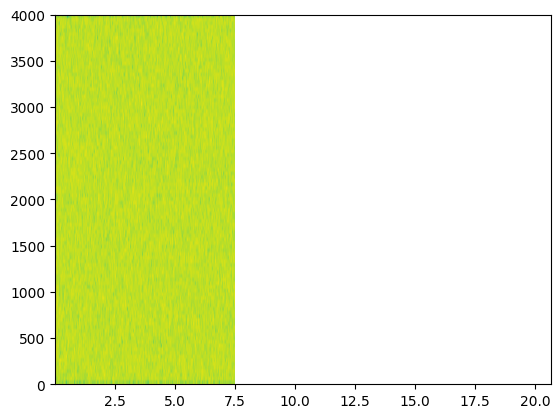

In [9]:
import numpy as np

x = graph_spectrogram("./audio/noisy_silent_audio.wav").T[0:1998,:]
print(x.shape)
# print(x)
np.savetxt("./audio/noisy_silent_audio.txt", x)
print(np.max(x))
print(np.min(x))


In [12]:
# Normal Distribution noise
mean = 0
std_dev = 1000  # Adjust the standard deviation to control the level of noise
num_samples = 15000
noise = np.random.normal(mean, std_dev, num_samples)
print(noise)

[   28.40427949     6.71905957  -700.63468495 ... -1308.51746009
   361.04541452  -327.64349815]


C:\Users\Dell\AppData\Local\Temp\ipykernel_26264\1439857071.py:11: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


PermissionError: [Errno 13] Permission denied: './andrew_data_set/audio'

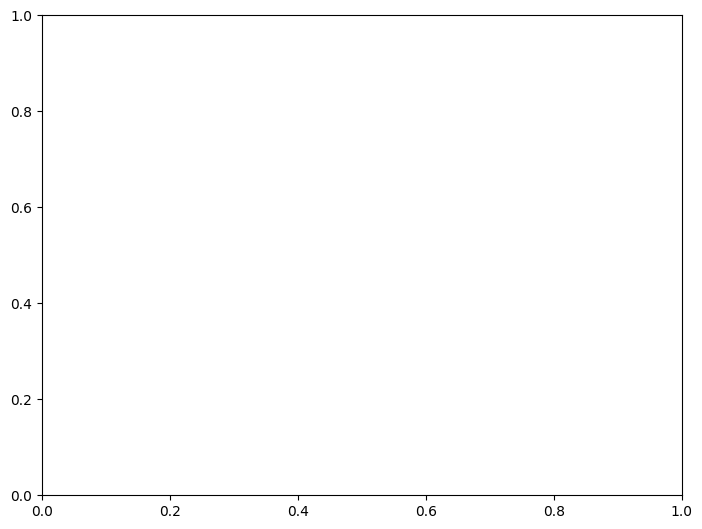

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [1]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

create_spectrogram('./andrew_data_set/audio','./andrew_data_set/audio_img')

In [2]:
print("Minimum value",  np.min(X_train))
print("Maximum value", np.max(X_train))
X_train=preprocessing(X_train)
print("Minimum value",  np.min(X_train))
print("Maximum value", np.max(X_train))


print("Minimum value",  np.min(X_val_real))
print("Maximum value", np.max(X_val_real))
X_val_real=preprocessing(X_val_real)
print("Minimum value",  np.min(X_val_real))
print("Maximum value", np.max(X_val_real))

print("Minimum value",  np.min(X_val_fake))
print("Maximum value", np.max(X_val_fake))
X_val_fake=preprocessing(X_val_fake)
print("Minimum value",  np.min(X_val_fake))
print("Maximum value", np.max(X_val_fake))


NameError: name 'X_train' is not defined

In [ ]:
# Define weighted binary cross-entropy loss function
def custom_binary_crossentropy(y_true, y_pred):
    # Define the weights for class 0 and class 1
    class0_weight = 0.5
    class1_weight = 0.5
    # Define the epsilon value to prevent log(0) error
    epsilon = 1e-7
    # Clip the predicted values to prevent log(0) error
    y_pred = K.clip(y_pred, epsilon, 1 - epsilon)
    # Calculate the binary cross-entropy loss
    loss = -(y_true * K.log(y_pred) * class1_weight + (1 - y_true) * K.log(1 - y_pred) * class0_weight)
    # Return the mean loss
    return K.mean(loss)